# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

### 2.3 What is SGD with Nesterov acceleration?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Previous post (own_tutorial_5.ipynb).

We have seen in the previous post the working of SGD with Momentum. And it was obvious from the definition of SGD with Momentum and animation that the optimizer oscillates. Sometimes it is required to reduce the oscillation and get faster convergence. 

For that, we use a trick which we call **Nesterov acceleration**. 

The trick is to calculate the update with correction. We do that by calculating update 2 times in which the second update is correction derived from the first update.

This post is divided into 3 sections.

1. SGD with Nesterov acceleration in 1 variable
2. SGD with Nesterov acceleration animation for 1 variable
3. SGD with Nesterov acceleration in multi-variable function

## #1 SGD with Nesterov acceleration in 1 variable

In this method, everything is the same as what we did in SGD with Momentum but we calculate the update 2 times before adding it to the point.

SGD with Nesterov acceleration algorithm in simple language is as follows:

> Step 1 - Set staring point and leanring rate

> Step 2 - Initialize update = 0 and momentum = 0.9

> Step 3 - Initiate loop

>          Step 3.1 - calculate update = -learning_rate * gradient + momentum * update

>          Step 3.2 - calculate update_ = -learning_rate * gradient + momentum * update

>          Step 3.3 - add update_ to point

>> Note — In this method the second update, i.e., ‘update_’ can be treated as update with correction.

First, let us define the function and its derivative and we start from x = -1

In [1]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [2]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition
    return x - x**3

def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now SGD with Nesterov acceleration

In [3]:
point = -1                                      # step 1
learning_rate = 0.01

momentum = 0.9                                  # step 2
update = 0

for i in range(1000): 
    base = - learning_rate * fdash(point)       # step 3
    update = base + momentum * update           # step 3.1
    update_ = base + momentum * update          # step 3.2
    point += update_                            # step 3.3
    
point                                           # Minima

-0.5773502691896258

## #2 SGD with Nesterov acceleration animation for better understanding

Everything thing is the same as what we did earlier for the animation of SGD or SGD with Momentum. 

We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter
point_sgd_nesterov = [-1]                   # initiating list with
                                            # starting point in it
point = -1                                  # step 1
learning_rate = 0.01

momentum = 0.9                              # step 2
update = 0

for i in range(1000):                       # step 3
    base = - learning_rate * fdash(point)   # Just optimise
    update = base + momentum * update       # step 3.1
    update_ = base + momentum * update      # step 3.2
    point += update_                        # step 3.3
    
    point_sgd_nesterov.append(point)        # adding updated point
                                            # to the list
    
point                                       # Minima

-0.5773502691896258

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'SGD with Nesterov acceleration, learning_rate = 0.01')

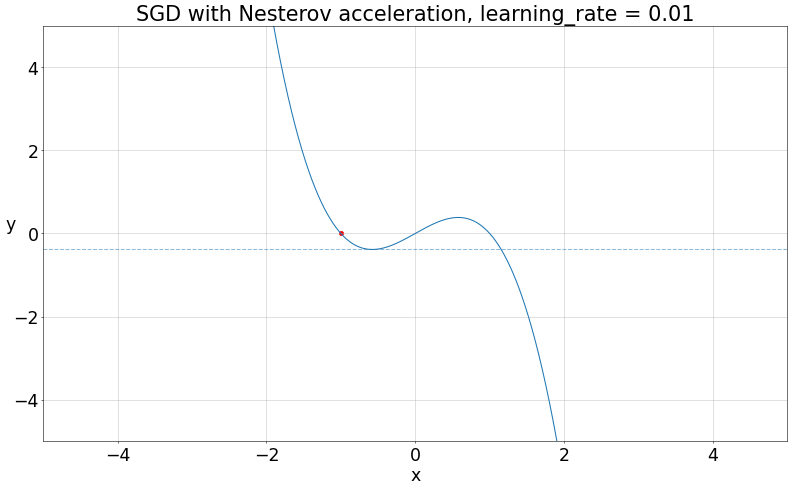

In [5]:
plt.rcParams.update({'font.size': 25})

fig = plt.figure(dpi = 50)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()

ax.plot(x_, y_)
ax.grid(alpha = 0.7)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red')
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)

ax.set_title('SGD with Nesterov acceleration, learning_rate = 0.01')

Now we will animate the SGD with Nesterov acceleration optimizer.

In [6]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('SGD with Nesterov acceleration, learning_rate = 0.01')
    
    ax.scatter(point_sgd_nesterov[i], f(point_sgd_nesterov[i]), color = 'red')

anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.3.SGD_with_Nesterov_acceleration.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 (10) ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 SGD with Nesterov acceleration in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and update = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array

In [7]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [8]:
def f(x, y):                                    # function definition
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    
 
def fdash_x(x, y):                              # partial derivative w.r.t x
    return 4*x + 2*y - 6                        

def fdash_y(x, y):                              # partial derivative w.r.t y
    return 2*x + 4*y                             

def gradient(point):
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)    # gradients

Now the steps for SGD with Nesterov acceleration in 2 variables are

In [9]:
point = np.array([[   1   ],                       # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 0.01

momentum = 0.9                                     # step 2
update = np.array([[   0   ],
                   [   0   ]], dtype = np.float64)

for i in range(1000):                              # step 3
    base = - learning_rate * gradient(point)
    update = base + momentum * update
                                                   # step 3.1
    update_ = -base + momentum * update
                                                   # step 3.2
    point += update_                               # step 3.3
    
point                                              # Minima

array([[ 2.],
       [-1.]])

I hope now you understand SGD with Nesterov acceleration.
If you want to study more about Nesterov acceleration, then you may look at the literature available on the internet.